<a href="https://colab.research.google.com/github/DaVinciAyo/data-science/blob/main/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##Load Dataset

In [ ]:
# Load California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Display basic dataset information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

In [ ]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

###Check correlation coefficients to check for multicollinearity

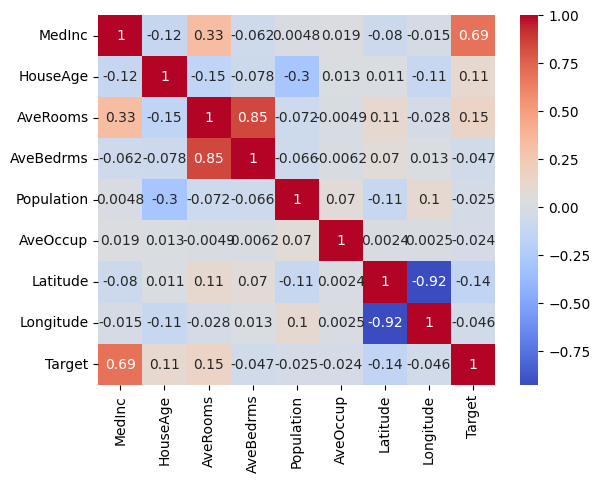

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

###Feature Selection

In [ ]:
df = df.drop(['Longitude', 'Latitude'], axis=1)

###Scaling features

In [ ]:
scaler = StandardScaler()
features = df.drop('Target', axis=1)  # Dropping the target column

scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Target'] = df['Target']
scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,3.422


In [ ]:
# Separate features (X) and target variable (y)
X = scaled_df.drop(columns=['Target'])  # Features
y = scaled_df['Target']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.3f}")

In [ ]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("\nLinear Regression Evaluation:")
evaluate_model(lr, X_test, y_test)

#Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
print("\nPolynomial Regression Evaluation:")
evaluate_model(poly_reg, X_test_poly, y_test)

#Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("\nRidge Regression Evaluation:")
evaluate_model(ridge, X_test, y_test)

#Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("\nLasso Regression Evaluation:")
evaluate_model(lasso, X_test, y_test)

#Decision Tree Regression
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
print("\nDecision Tree Regression Evaluation:")
evaluate_model(dt, X_test, y_test)


Linear Regression Evaluation:
MAE: 0.579
MSE: 0.642
RMSE: 0.801
R² Score: 0.510

Polynomial Regression Evaluation:
MAE: 0.538
MSE: 0.558
RMSE: 0.747
R² Score: 0.574

Ridge Regression Evaluation:
MAE: 0.579
MSE: 0.642
RMSE: 0.801
R² Score: 0.510

Lasso Regression Evaluation:
MAE: 0.623
MSE: 0.682
RMSE: 0.826
R² Score: 0.480

Decision Tree Regression Evaluation:
MAE: 0.598
MSE: 0.642
RMSE: 0.802
R² Score: 0.510


In [ ]:
#Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("\nRandom Forest Regression Evaluation:")
evaluate_model(rf, X_test, y_test)


Random Forest Regression Evaluation:
MAE: 0.462
MSE: 0.423
RMSE: 0.650
R² Score: 0.677


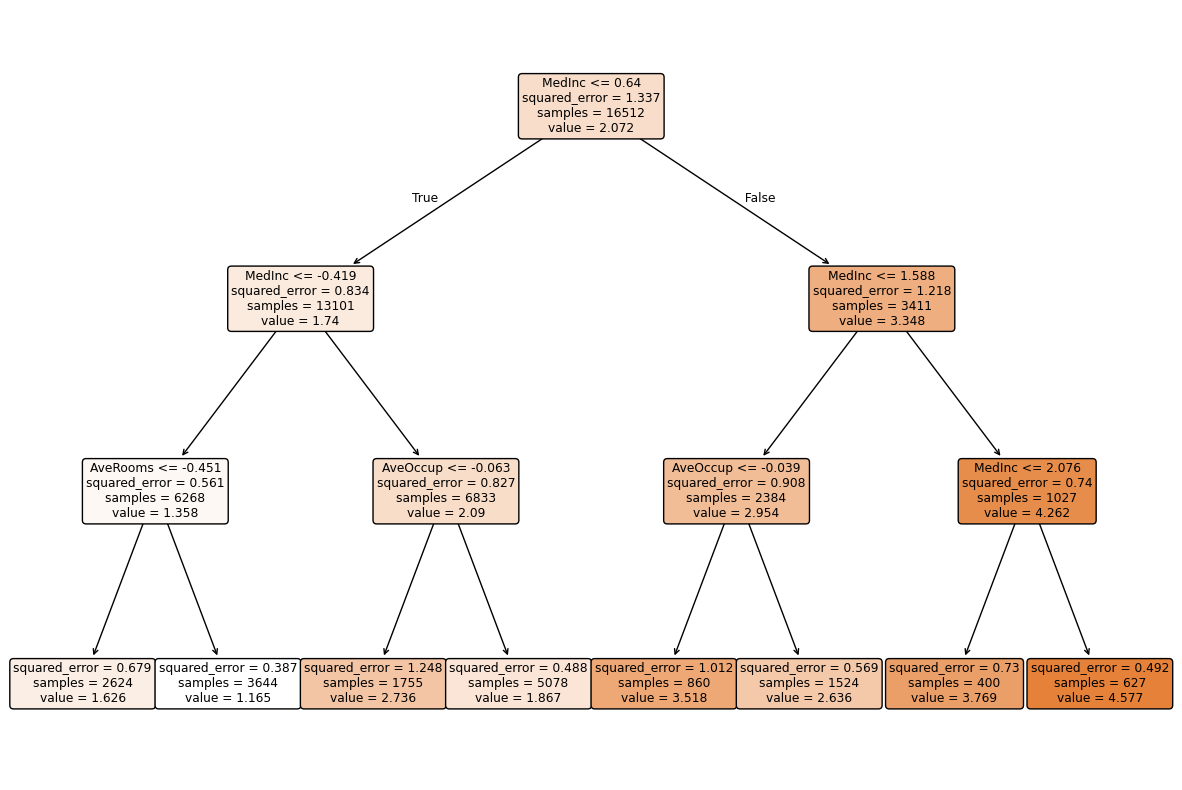

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()